# Comparando indices ao redor  do mundo
### Vamos plotar o histórico de alguns dos principais indices mundiais e compara-los

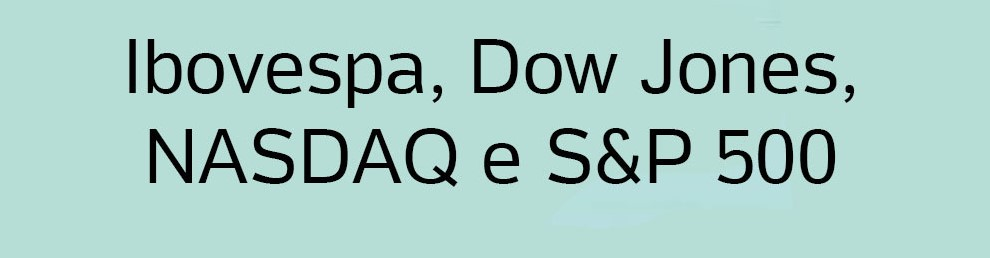

#### Importando biblicotecas que serão usadas nesse notebook

In [20]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Vou armazenar as siglas dos indices em variaveis com os nomes explicitos para facilitar a compreensão daqueles que não estejam familiarizados 

In [21]:
Bovespa = '^BVSP'
SP500 = '^GSPC' 
Dax = '^GDAXI'
Nasdaq = '^IXIC'
Dow = '^DJI'

#### Aqui nós carregamos um DataFrame que chamamos de "data" com os dados desde o ano de 1997 em uma lista que chamamos de "indices"...
#### Carregamos apenas a coluna "Adj Close(Preço ajustado)", para essa comparação apenas isso nos interessa.
#### Usamos o "Yahoo finance" como fonte de dados

In [22]:
indices = [Bovespa, SP500, Dax, Nasdaq, Dow]

data = pd.DataFrame()
for i in indices:
    data[i] = wb.DataReader(i, 'yahoo', '1997-1-1')['Adj Close']

#### Vamos conferir se esta tudo certo com os nossos dados

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6000 entries, 1997-01-02 to 2021-04-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^BVSP   6000 non-null   float64
 1   ^GSPC   5852 non-null   float64
 2   ^GDAXI  5936 non-null   float64
 3   ^IXIC   5852 non-null   float64
 4   ^DJI    5852 non-null   float64
dtypes: float64(5)
memory usage: 281.2 KB


In [24]:
data.head(10)

,^BVSP,^GSPC,^GDAXI,^IXIC,^DJI
Date,,,,,
1997-01-02,6955.500000,737.010010,2820.810059,1280.699951,6442.490234
1997-01-03,6997.799805,748.030029,2863.260010,1310.680054,6544.089844
1997-01-06,7159.500000,747.650024,2890.199951,1316.400024,6567.180176
1997-01-07,7159.500000,753.229980,2876.340088,1327.729980,6600.660156
1997-01-08,7427.000000,748.409973,2904.080078,1320.349976,6549.479980
1997-01-09,7454.200195,754.849976,2936.689941,1326.199951,6625.669922
1997-01-10,7478.299805,759.500000,2915.810059,1332.020020,6703.790039
1997-01-13,7411.799805,759.510010,2956.780029,1330.910034,6709.180176
1997-01-14,7621.100098,768.859985,2978.840088,1346.359985,6762.290039


In [25]:
data.tail(10)

,^BVSP,^GSPC,^GDAXI,^IXIC,^DJI
Date,,,,,
2021-03-25,113750.0000,3909.520020,14621.360352,12977.679688,32619.480469
2021-03-26,114781.0000,3974.540039,14748.940430,13138.730469,33072.878906
2021-03-29,115419.0000,3971.090088,14817.719727,13059.650391,33171.371094
2021-03-30,116850.0000,3958.550049,15008.610352,13045.389648,33066.960938
2021-03-31,116634.0000,3972.889893,15008.339844,13246.870117,32981.550781
2021-04-01,115253.0000,4019.870117,15107.169922,13480.110352,33153.210938
2021-04-05,117518.0000,4077.909912,NaN,13705.589844,33527.191406
2021-04-06,117499.0000,4073.939941,15212.679688,13698.379883,33430.238281
2021-04-07,117624.0000,4079.949951,15176.360352,13688.839844,33446.261719


#### Agora estamos prontos para plotar os dados e obtermos uma comparação visual e de fácil compreensão, mas para isso precisamos normalizar os nossos dados para base 100(pratica comum no mundo das finanças)

In [26]:
normalizado = (data / data.iloc[1] * 100)

#### Vamos lá?

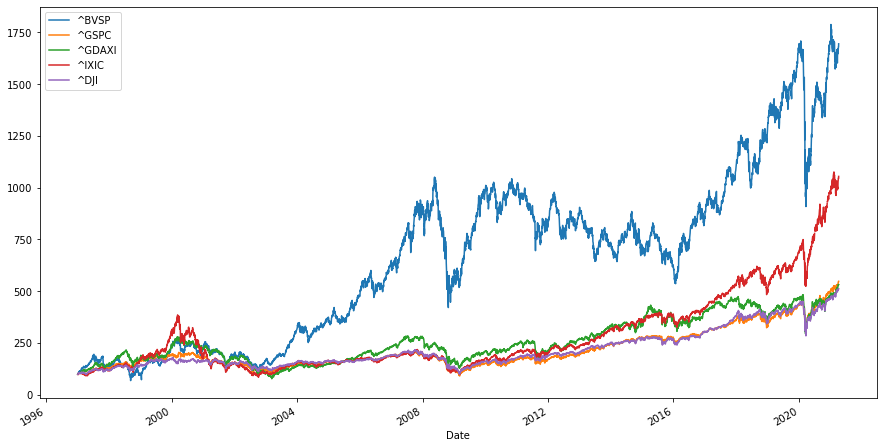

In [27]:
normalizado.plot(figsize=(15,8))

## Vejamos o retorno anual medio de cada indice de maneira percentual

In [28]:
retorno_ind = (data / data.shift(1)) - 1
retorno_ind.tail()

,^BVSP,^GSPC,^GDAXI,^IXIC,^DJI
Date,,,,,
2021-04-01,-0.011840,0.011825,0.006585,0.017607,0.005205
2021-04-05,0.019652,0.014438,NaN,0.016727,0.011280
2021-04-06,-0.000162,-0.000974,NaN,-0.000526,-0.002892
2021-04-07,0.001064,0.001475,-0.002387,-0.000696,0.000479
2021-04-08,0.007955,0.003431,0.001734,0.009106,0.000002


In [29]:
retorno_anual = retorno_ind.mean()*250
print(str(round(retorno_anual, 5)*100))

^BVSP     17.012
^GSPC      9.842
^GDAXI     9.544
^IXIC     13.824
^DJI       9.438
dtype: float64


## Vou deixar você tirar suas proprias conclusões.

### Mas...

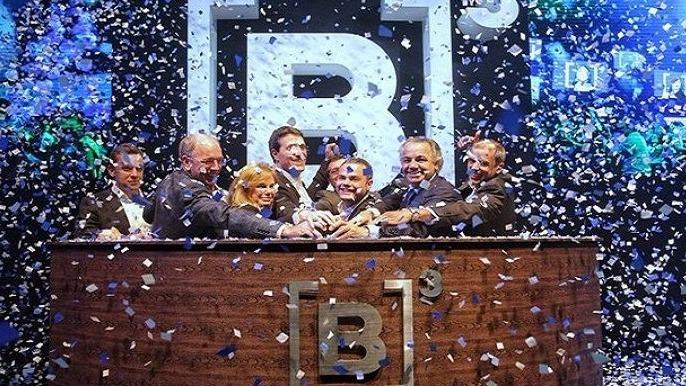